In this project we are prediting the time the client is spending either on the app or website.

The company wants to put most of its effort on the one that will have more time spent on it.

## 1. Importing The Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

## 2. Data Wrangling

In [2]:
df = pd.read_csv("Ecommerce Customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## 3. Visualization

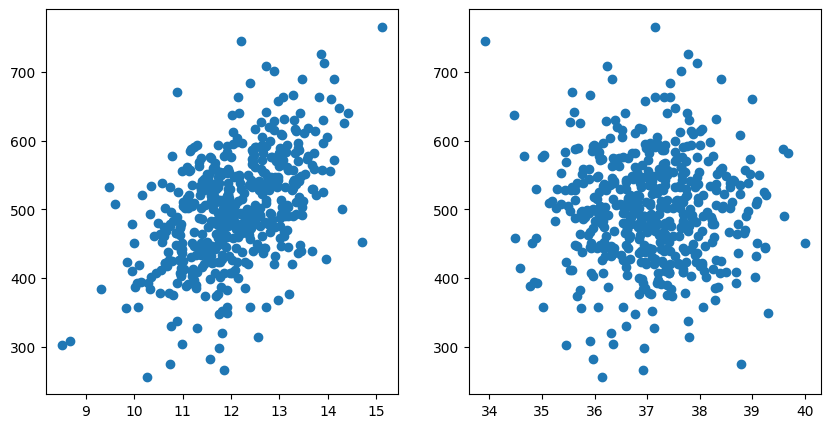

In [5]:
# Creating a plot
fig, (ax1, ax2) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (10, 5))
# Fill These graphs with data
ax1.scatter(df["Time on App"], df["Yearly Amount Spent"])
ax2.scatter(df["Time on Website"], df["Yearly Amount Spent"])

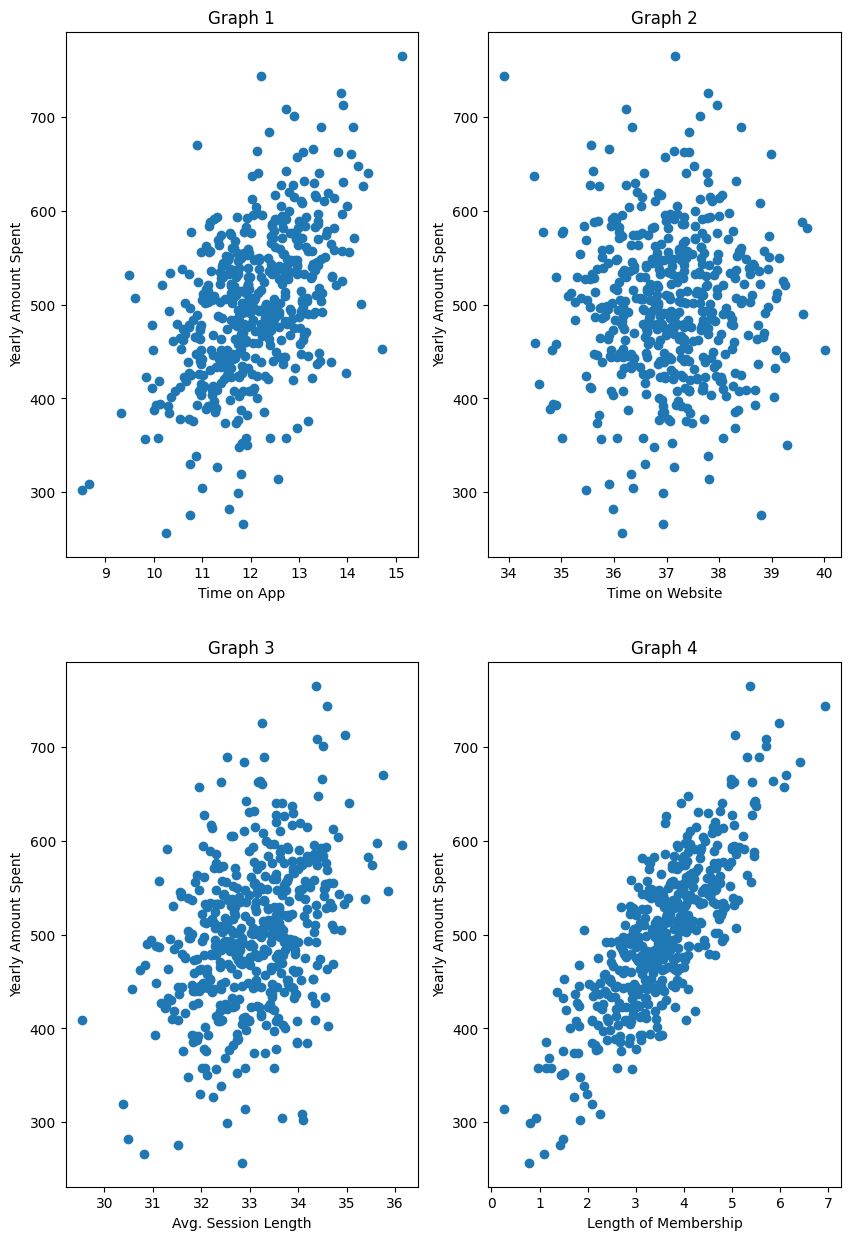

In [6]:
# Creating the Plot
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows = 2,
                               ncols = 2,
                               figsize = (10,15))

# Scatter Graph
ax1.scatter(df["Time on App"],df["Yearly Amount Spent"])
ax2.scatter(df["Time on Website"],df["Yearly Amount Spent"])
ax3.scatter(df["Avg. Session Length"],df["Yearly Amount Spent"])
ax4.scatter(df["Length of Membership"],df["Yearly Amount Spent"])

# Some Decoration
ax1.set(title = "Graph 1",
        xlabel = "Time on App",
        ylabel = "Yearly Amount Spent")

ax2.set(title = "Graph 2",
        xlabel = "Time on Website",
        ylabel = "Yearly Amount Spent")

ax3.set(title = "Graph 3",
        xlabel = "Avg. Session Length",
        ylabel = "Yearly Amount Spent")

ax4.set(title = "Graph 4",
        xlabel = "Length of Membership",
        ylabel = "Yearly Amount Spent");

## 4. Splitting The Data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 5. Fitting Data into the Model

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()

In [12]:
lm.fit(X_train, y_train)

LinearRegression()

In [13]:
lm.coef_

array([25.5962591 , 38.78534598,  0.31038593, 61.89682859])

In [14]:
lm.score(X, y)

0.9842900924920523

In [15]:
# Let's show each Column Coeffecient
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.596259
Time on App           38.785346
Time on Website        0.310386
Length of Membership  61.896829


## 6. Predicting Test Data

In [16]:
predictions = lm.predict(X_test)

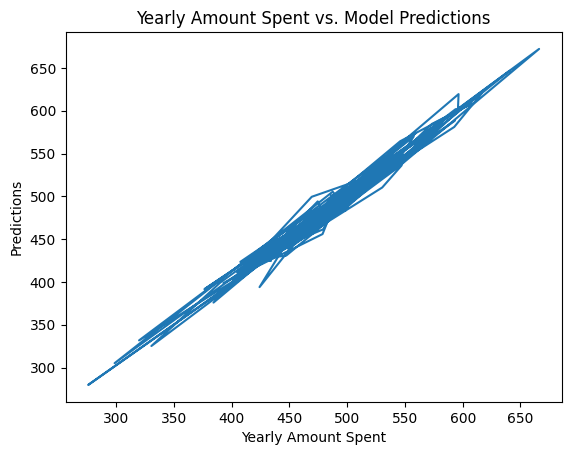

In [17]:
# Let's see how it looks
plt.plot(y_test, predictions)
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions');

# 7. Evaluating The Model

In [18]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
import math

In [19]:
print("Mean Squared Error :", mean_squared_error(y_test,predictions))
print("Mean Absolute Error :", mean_absolute_error(y_test,predictions))
print("RMSE :", math.sqrt(mean_squared_error(y_test,predictions)))

Mean Squared Error : 109.86374118394002
Mean Absolute Error : 8.558441885315247
RMSE : 10.481590584636477


In [20]:
#Error
Error = y_test - predictions

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8828\2138790842.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Error, bins=30);


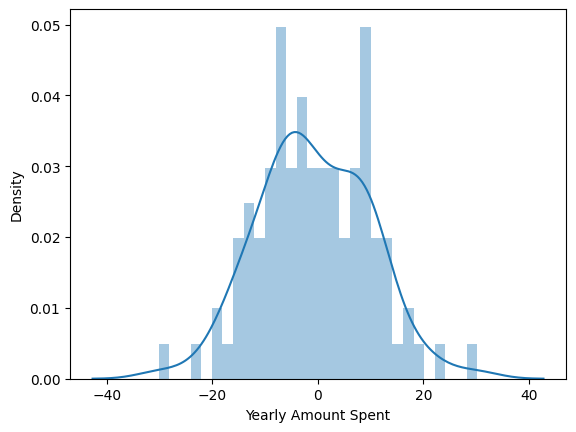

In [21]:
#Optional
import seaborn as sns
sns.distplot(Error, bins=30);

## Author : Mohamed Emad